## Illustratating multiple die rolls approximating a normal distribution

In [1]:
import matplotlib.pyplot as plt 
import numpy as np

### Let's make a function so we can characterize the probability of an individual roll

In [12]:
# This just represents equal probability for each roll.  It is just here for possible experimentation.
def p(n,k):
    prob = 1/k
            
    return prob

### Let's make a function to find the probability distribution for 'n' die rolls (each with 'base' sides)

In [13]:
def die_pd(n,base):
    my_dict = dict()
    
    # we model the rolls as an 'n' digit number of base 'base'    
    for i in range(0,base**n):
        sum = 0
        pr = 1
        st = i
        for j in range(0,n):
            # this is like decomposing digit in a base 'base' number
            val = base**(n-j-1)
            dig = int(st/val)
            st -= val*dig

            # make each digit represent a die roll
            die = dig + 1
            pr *= p(die,base)
            sum = sum + die
            
        old = my_dict.get(sum,0)
        val = old + pr
        my_dict[sum] = val

    return my_dict

## Let's make a function to plot the probability distribution... 

In [15]:
def plot_pd(num_die, die_sides):
    # get the probability distribution
    pd = die_pd(num_die,die_sides)
    
    # Let's get the probability distribution into a list, then an numpy array
    l = []
    for i in pd.items():
       l.append(i)

    my_array = np.array(l)
    my_min = min(my_array[:,0])
    my_max = max(my_array[:,0])
    
    # we will center the distribution with this offset
    # for fair dice, this offset will be the expected value
    offset = (my_max-my_min)/2+my_min
    
    plt.title("Rolling %d die, %d-sided. Min: %d Max: %d Offset: %.2f" % (num_die, die_sides, my_min, my_max, offset) )
    plt.ylabel("Probability")
    plt.ylabel("Offset")

    plt.plot(my_array[:,0]-offset,my_array[:,1])

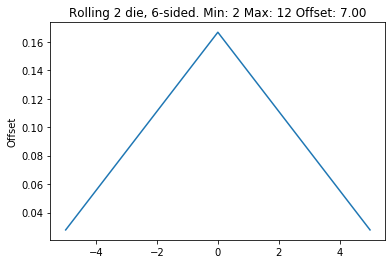

In [16]:
plot_pd(2, 6)

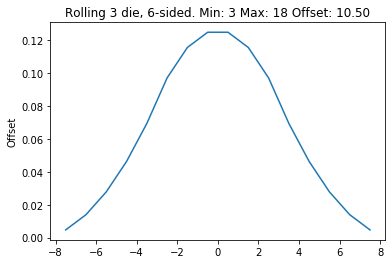

In [17]:
plot_pd(3, 6)

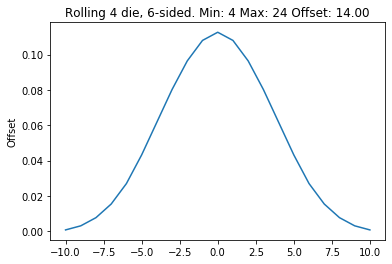

In [18]:
plot_pd(4, 6)

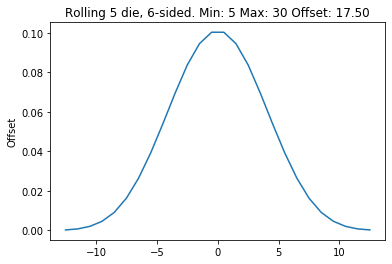

In [19]:
plot_pd(5, 6)

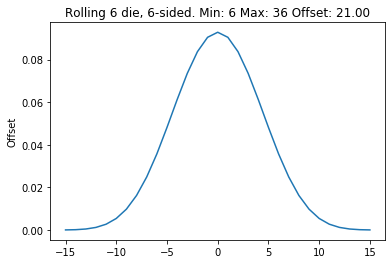

In [20]:
plot_pd(6, 6)

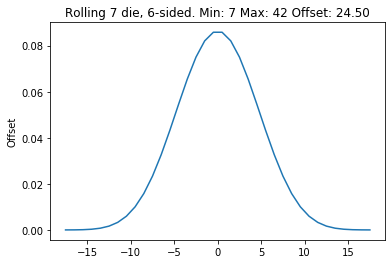

In [21]:
plot_pd(7, 6)

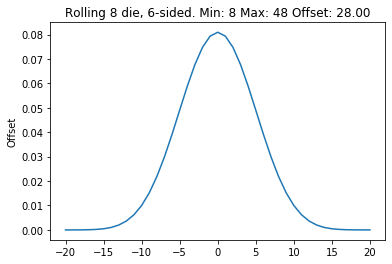

In [22]:
plot_pd(8, 6)